In [1]:
from numpy import linspace, meshgrid, array, sin, cos, pi, abs
from scipy.special import sph_harm
from mayavi import mlab



In [2]:
# Interactive? Broken... base code 64 module error - 2021-0211-MLR on mri1.
# from mayavi import mlab
# mlab.init_notebook()

In [2]:
# Opens a window
mlab.test_contour3d()
mlab.show()

In [3]:
mlab.options.offscreen = True
mlab.test_contour3d()
mlab.savefig('example.png')

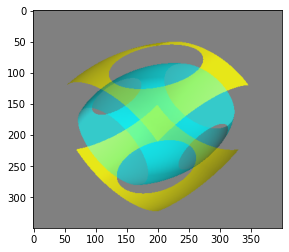

In [4]:
# %pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('example.png')
imgplot = plt.imshow(img)
plt.show()

In [10]:
theta_1d = linspace(0,   pi,  91) 
phi_1d   = linspace(0, 2*pi, 181)

theta_2d, phi_2d = meshgrid(theta_1d, phi_1d)
xyz_2d = array([sin(theta_2d) * sin(phi_2d),
                sin(theta_2d) * cos(phi_2d),
                cos(theta_2d)]) 
l = 3
m = 0

Y_lm = sph_harm(m, l, phi_2d, theta_2d)
r = abs(Y_lm.real) * xyz_2d

# mlab.figure(size=(700, 830))
mlab.figure(size=(1400, 1660))
mlab.mesh(r[0], r[1], r[2], scalars=Y_lm.real, colormap="cool")
mlab.view(azimuth=0, elevation=75, distance=2.4, roll=-50)
mlab_output = "Y_%i_%i.jpg" % (l, m)
print('savefig: ',mlab_output)
mlab.savefig(mlab_output)
mlab.show()

savefig:  Y_3_0.jpg


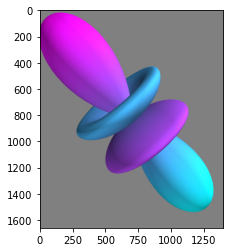

In [11]:
# %pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(mlab_output)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
Broken = True
if not Broken:
    mlab.options.offscreen = False
    mlab.test_contour3d()
    # mlab.init_notebook()
    mlab.show()

In [8]:
import numpy as np
import mayavi.mlab as mlab
from mayavi.mlab import *

def test_triangular_mesh():
    """An example of a cone, ie a non-regular mesh defined by its
        triangles.
    """
    n = 8
    t = np.linspace(-np.pi, np.pi, n)
    z = np.exp(1j * t)
    x = z.real.copy()
    y = z.imag.copy()
    z = np.zeros_like(x)

    triangles = [(0, i, i + 1) for i in range(1, n)]
    x = np.r_[0, x]
    y = np.r_[0, y]
    z = np.r_[1, z]
    t = np.r_[0, t]

    return triangular_mesh(x, y, z, triangles, scalars=t)

test_triangular_mesh()
# mlab.show()

savefig:  test.jpg


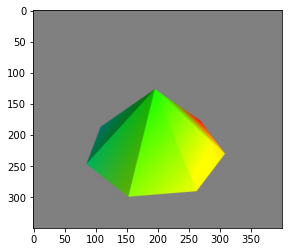

In [9]:
# mlab.view(azimuth=0, elevation=75, distance=100, roll=-50)
# mlab.show()
mlab.options.offscreen = True
mlab_output = "test.jpg"
print('savefig: ',mlab_output)
mlab.savefig(mlab_output)
# mlab.show()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('test.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
mlab.options.offscreen = False
mlab.show()

In [6]:
import pystare as ps
import numpy as np

In [2]:
deg = 1

spatial_index_MaunaLoa = 0x2c2401f47797ec4b # Mauna Loa, ~ 5 km
finest_resolution = 10 # ~10km

# Make a cover centered on Mauna Loa
cover_MaunaLoa = ps.circular_cover_from(spatial_index_MaunaLoa,1*deg,finest_resolution)

In [16]:
lons,lats,intmat = ps.triangulate_indices(cover_MaunaLoa)
mlab.triangular_mesh(lons,lats,np.zeros(lons.shape),intmat
                     # ,representation='wireframe'
                     ,scalars=np.linspace(0, 1, len(lons))
                    )

In [17]:
mlab.show()